In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Projetos de Pesquisa e Extensão/Pesquisas 2024-2025/Internet of Things 2025/dataset_rotulado_falha_nao_falha.txt')
data.sort_values(by="label",ascending=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,2F03_COLISÃO_S3,2F03_VIBRAÇÃO_GLOBAL_S3,2F03_ROLAMENTO3_S3,2F03_REDE_S3,2F03_ROLAMENTO1_S3,2F03_ROLAMENTO2_S3,2F03_DESBALANCEAMENTO_S3,label
767,15.892150,0.245994,11.71175,0.107772,4.392094,4.951548,0.065820,1
1015,6.978260,0.239681,11.78542,0.083305,4.400845,4.943706,0.065876,1
1845,11.011000,0.352170,11.62881,0.074872,4.394700,5.004845,0.057822,1
1846,10.790450,0.352170,11.62881,0.074872,4.394700,5.004845,0.057822,1
1847,15.189050,0.352170,11.62881,0.074872,4.394700,5.004845,0.057822,1
...,...,...,...,...,...,...,...,...
1158,11.859380,0.150089,11.59107,0.085862,4.415333,4.997947,0.061494,0
1159,10.462910,0.150089,11.59107,0.085862,4.415333,4.997947,0.061494,0
1160,17.304460,0.150089,11.59107,0.085862,4.415333,4.997947,0.061494,0
1161,13.316650,0.150089,11.59107,0.085862,4.415333,4.997947,0.061494,0


In [ ]:
!pip install pycaret

In [3]:
from pycaret.classification import *

test=data.sample(frac=0.10, random_state=1,)
train=data.drop(test.index)

# configurando o ambiente
# O parâmetro session_id serve apenas para garantir que os resultados obtidos são sempre os mesmos a cada execução
reg = setup(data = train, target = 'label', remove_outliers= True, normalize = True, feature_selection = True, fix_imbalance= True, session_id=1)


[LightGBM] [Info] Number of positive: 867, number of negative: 867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1773
[LightGBM] [Info] Number of data points in the train set: 1734, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,1
1,Target,label
2,Target type,Binary
3,Original data shape,"(1871, 8)"
4,Transformed data shape,"(2296, 2)"
5,Transformed train set shape,"(1734, 2)"
6,Transformed test set shape,"(562, 2)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9526,0.9898,0.9514,0.9813,0.9659,0.8883,0.8902,0.3660
et,Extra Trees Classifier,0.9526,0.9898,0.9514,0.9813,0.9659,0.8883,0.8902,0.5370
lightgbm,Light Gradient Boosting Machine,0.9480,0.9919,0.9460,0.9802,0.9625,0.8782,0.8808,0.9220
rf,Random Forest Classifier,0.9473,0.9908,0.9481,0.9770,0.9620,0.8757,0.8781,0.5800
knn,K Neighbors Classifier,0.9427,0.9854,0.9481,0.9707,0.9588,0.8646,0.8672,0.4840
gbc,Gradient Boosting Classifier,0.9404,0.9894,0.9416,0.9734,0.9570,0.8598,0.8620,0.4680
xgboost,Extreme Gradient Boosting,0.9373,0.9883,0.9286,0.9821,0.9542,0.8551,0.8600,0.4440
ada,Ada Boost Classifier,0.9045,0.9624,0.9112,0.9522,0.9309,0.7763,0.7796,0.4840
nb,Naive Bayes,0.6792,0.6946,0.7489,0.7882,0.7673,0.2492,0.2515,0.4280
qda,Quadratic Discriminant Analysis,0.6792,0.6946,0.7489,0.7882,0.7673,0.2492,0.2515,0.5140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
dt = create_model('dt',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9268,0.9591,0.9481,0.9481,0.9481,0.8240,0.8240
1,0.9679,0.9892,0.9675,0.9868,0.9770,0.9236,0.9241
2,0.9518,0.9935,0.9481,0.9832,0.9653,0.8867,0.8883
Mean,0.9488,0.9806,0.9545,0.9727,0.9635,0.8781,0.8788
Std,0.0169,0.0153,0.0092,0.0175,0.0119,0.0411,0.0414


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_dt = tune_model(dt,optimize="Accuracy")
tuned_model_custom = tune_model(dt)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9466,0.9973,0.9247,1.0000,0.9609,0.8770,0.8837
1,0.9466,0.9868,0.9462,0.9778,0.9617,0.8732,0.8745
2,0.9160,0.9825,0.9355,0.9457,0.9405,0.7977,0.7978
3,0.9084,0.9842,0.8817,0.9880,0.9318,0.7936,0.8056
4,0.9695,0.9889,0.9783,0.9783,0.9783,0.9270,0.9270
5,0.9466,0.9933,0.9348,0.9885,0.9609,0.8768,0.8802
6,0.9695,0.9923,0.9783,0.9783,0.9783,0.9270,0.9270
7,0.9695,0.9946,0.9674,0.9889,0.9780,0.9280,0.9286
8,0.9695,0.9965,0.9674,0.9889,0.9780,0.9280,0.9286


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9466,0.9973,0.9247,1.0000,0.9609,0.8770,0.8837
1,0.9466,0.9868,0.9462,0.9778,0.9617,0.8732,0.8745
2,0.9160,0.9825,0.9355,0.9457,0.9405,0.7977,0.7978
3,0.9084,0.9842,0.8817,0.9880,0.9318,0.7936,0.8056
4,0.9695,0.9889,0.9783,0.9783,0.9783,0.9270,0.9270
5,0.9466,0.9933,0.9348,0.9885,0.9609,0.8768,0.8802
6,0.9695,0.9923,0.9783,0.9783,0.9783,0.9270,0.9270
7,0.9695,0.9946,0.9674,0.9889,0.9780,0.9280,0.9286
8,0.9695,0.9965,0.9674,0.9889,0.9780,0.9280,0.9286


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9199,0.9776,0.9093,0.9757,0.9413,0.8158,0.8208


,2F03_COLISÃO_S3,2F03_VIBRAÇÃO_GLOBAL_S3,2F03_ROLAMENTO3_S3,2F03_REDE_S3,2F03_ROLAMENTO1_S3,2F03_ROLAMENTO2_S3,2F03_DESBALANCEAMENTO_S3,label,prediction_label,prediction_score
1854,14.958750,0.376993,11.62881,0.074872,4.394700,4.877644,0.057822,1,1,1.0000
1948,8.324739,0.396228,11.62881,0.086990,4.424696,4.982852,0.060358,1,1,1.0000
344,18.232550,0.129020,11.97768,0.092280,4.440625,5.005639,0.060549,0,0,0.7719
1986,15.855850,0.374886,11.85905,0.081161,4.424696,5.033143,0.060862,1,1,1.0000
759,12.341500,0.245645,11.71175,0.107772,4.392094,4.951548,0.066108,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...
827,9.271829,0.249358,11.71175,0.094973,4.400867,5.039347,0.065820,1,1,1.0000
361,15.940940,0.134993,11.97768,0.079934,4.440625,5.005639,0.060549,0,0,0.7719
1006,10.442620,0.254808,11.76223,0.086923,4.415465,4.943706,0.065876,1,1,1.0000
868,5.100216,0.238158,11.80389,0.107191,4.394403,5.039347,0.065797,1,1,1.0000


In [ ]:
final_model = finalize_model(dt)
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['2F03_COLISÃO_S3',
                                             '2F03_VIBRAÇÃO_GLOBAL_S3',
                                             '2F03_ROLAMENTO3_S3',
                                             '2F03_REDE_S3',
                                             '2F03_ROLAMENTO1_S3',
                                             '2F03_ROLAMENTO2_S3',
                                             '2F03_DESBALANCEAMENTO_S3'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=F...
                                    transformer=CleanColumnNames(match='[\\]\\[

In [ ]:
unseen_predictions=predict_model(final_model, test)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9663,0.9809,0.9739,0.9803,0.9770,0.9140,0.9141


,2F03_COLISÃO_S3,2F03_VIBRAÇÃO_GLOBAL_S3,2F03_ROLAMENTO3_S3,2F03_REDE_S3,2F03_ROLAMENTO1_S3,2F03_ROLAMENTO2_S3,2F03_DESBALANCEAMENTO_S3,label,prediction_label,prediction_score
726,8.522325,0.241362,11.82166,0.112826,4.377297,5.043038,0.066188,1,1,0.7298
348,7.289566,0.129020,11.97768,0.079934,4.440625,5.005639,0.060549,0,0,0.6406
102,11.989620,0.135731,12.02413,0.078998,4.412321,5.046040,0.058455,1,1,0.9944
1272,12.550910,0.133094,11.66594,0.084300,4.423041,5.093780,0.061983,1,1,0.9985
1994,17.922621,0.388702,11.85905,0.081161,4.454359,5.033143,0.060862,1,1,0.9979
...,...,...,...,...,...,...,...,...,...,...
1104,13.603150,0.146172,11.81635,0.083213,4.411170,5.024092,0.061615,0,0,0.9555
1179,11.143620,0.135574,11.62247,0.085862,4.415333,5.003567,0.062383,1,1,0.9983
1654,9.865036,0.136189,12.18245,0.084752,4.425452,4.998000,0.062684,1,1,0.9722
368,10.959950,0.142156,11.97768,0.079934,4.440625,5.005639,0.060549,0,0,0.6406


In [ ]:
save_model(final_model, 'modelo_classificado_pronto')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['2F03_COLISÃO_S3',
                                              '2F03_VIBRAÇÃO_GLOBAL_S3',
                                              '2F03_ROLAMENTO3_S3',
                                              '2F03_REDE_S3',
                                              '2F03_ROLAMENTO1_S3',
                                              '2F03_ROLAMENTO2_S3',
                                              '2F03_DESBALANCEAMENTO_S3'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=F...
                                     transformer=CleanColumnNames

In [ ]:
# Recarregando o modelo salvo em disco

loaded_model = load_model('modelo_classificado_pronto')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['2F03_COLISÃO_S3',
                                             '2F03_VIBRAÇÃO_GLOBAL_S3',
                                             '2F03_ROLAMENTO3_S3',
                                             '2F03_REDE_S3',
                                             '2F03_ROLAMENTO1_S3',
                                             '2F03_ROLAMENTO2_S3',
                                             '2F03_DESBALANCEAMENTO_S3'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty...
                         

Testando questões de viabilidade e escalabilidade

,Description,Value
0,Session id,4011
1,Target,label
2,Target type,Binary
3,Original data shape,"(2079, 8)"
4,Transformed data shape,"(2079, 8)"
5,Transformed train set shape,"(1455, 8)"
6,Transformed test set shape,"(624, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9869,0.9964,0.9903,0.9914,0.9908,0.9685,0.9689,0.3030
et,Extra Trees Classifier,0.9849,0.9943,0.9874,0.9914,0.9893,0.9637,0.9643,0.3450
rf,Random Forest Classifier,0.9842,0.9968,0.9874,0.9904,0.9888,0.9620,0.9626,0.2580
xgboost,Extreme Gradient Boosting,0.9842,0.9977,0.9874,0.9905,0.9888,0.9619,0.9625,0.1170
dt,Decision Tree Classifier,0.9814,0.9779,0.9864,0.9877,0.9869,0.9552,0.9562,0.0590
gbc,Gradient Boosting Classifier,0.9725,0.9937,0.9767,0.9848,0.9806,0.9336,0.9349,0.2500
ada,Ada Boost Classifier,0.9416,0.9857,0.9748,0.9455,0.9596,0.8540,0.8570,0.1380
knn,K Neighbors Classifier,0.7904,0.8346,0.8769,0.8364,0.8559,0.4716,0.4744,0.0840
qda,Quadratic Discriminant Analysis,0.7787,0.8223,0.9127,0.8090,0.8521,0.4004,0.4341,0.0280
nb,Naive Bayes,0.7423,0.7852,0.8701,0.7944,0.8249,0.3208,0.3406,0.0510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

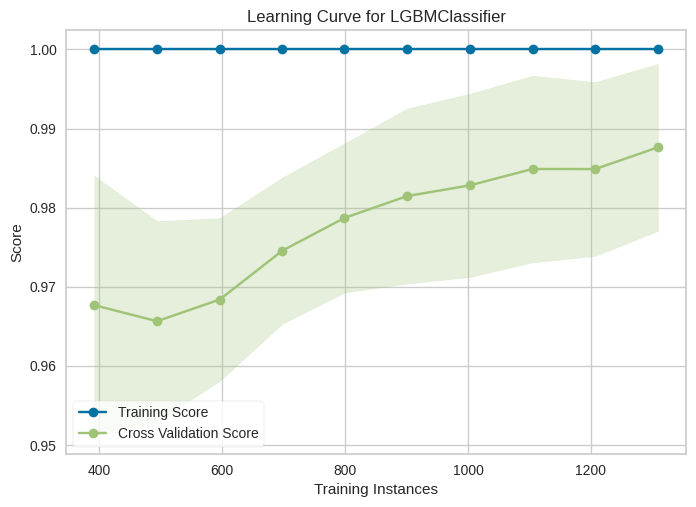

In [6]:
from pycaret.classification import *
exp = setup(data, target='label')
best = compare_models(sort='Accuracy')
plot_model(best, plot='learning')

In [9]:
for size in [0.1, 0.3, 0.5, 1.0]:  # Frações do dataset
    data_sample = data.sample(frac=size)
    exp = setup(data_sample, target='label')
    time = %timeit -o -q compare_models()
    print(f"Tamanho {size}: {time.average:.2f} segundos")

,Description,Value
0,Session id,3534
1,Target,label
2,Target type,Binary
3,Original data shape,"(208, 8)"
4,Transformed data shape,"(208, 8)"
5,Transformed train set shape,"(145, 8)"
6,Transformed test set shape,"(63, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9105,0.9701,0.9389,0.9412,0.9356,0.7773,0.8003,0.2070
ada,Ada Boost Classifier,0.9038,0.9484,0.9389,0.9321,0.9303,0.7690,0.7932,0.1080
gbc,Gradient Boosting Classifier,0.9038,0.9581,0.9389,0.9330,0.9303,0.7689,0.7951,0.1260
et,Extra Trees Classifier,0.9029,0.9749,0.9367,0.9266,0.9286,0.7646,0.7826,0.1440
xgboost,Extreme Gradient Boosting,0.8629,0.9298,0.8989,0.9130,0.8989,0.6740,0.7003,0.0530
lightgbm,Light Gradient Boosting Machine,0.8557,0.9266,0.9189,0.8884,0.8945,0.6459,0.6759,0.3040
dt,Decision Tree Classifier,0.8500,0.8294,0.8889,0.8998,0.8897,0.6510,0.6656,0.0530
qda,Quadratic Discriminant Analysis,0.7576,0.8720,0.9278,0.7753,0.8391,0.3320,0.3667,0.0280
lr,Logistic Regression,0.7452,0.7321,0.9800,0.7344,0.8385,0.2647,0.3235,0.0370
lda,Linear Discriminant Analysis,0.7162,0.8198,0.7867,0.7933,0.7824,0.3622,0.3786,0.0270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9105,0.9701,0.9389,0.9412,0.9356,0.7773,0.8003,0.1830
ada,Ada Boost Classifier,0.9038,0.9484,0.9389,0.9321,0.9303,0.7690,0.7932,0.1110
gbc,Gradient Boosting Classifier,0.9038,0.9581,0.9389,0.9330,0.9303,0.7689,0.7951,0.1220
et,Extra Trees Classifier,0.9029,0.9749,0.9367,0.9266,0.9286,0.7646,0.7826,0.2730
xgboost,Extreme Gradient Boosting,0.8629,0.9298,0.8989,0.9130,0.8989,0.6740,0.7003,0.0930
lightgbm,Light Gradient Boosting Machine,0.8557,0.9266,0.9189,0.8884,0.8945,0.6459,0.6759,0.2830
dt,Decision Tree Classifier,0.8500,0.8294,0.8889,0.8998,0.8897,0.6510,0.6656,0.0270
qda,Quadratic Discriminant Analysis,0.7576,0.8720,0.9278,0.7753,0.8391,0.3320,0.3667,0.0260
lr,Logistic Regression,0.7452,0.7321,0.9800,0.7344,0.8385,0.2647,0.3235,0.0480
lda,Linear Discriminant Analysis,0.7162,0.8198,0.7867,0.7933,0.7824,0.3622,0.3786,0.0300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9105,0.9701,0.9389,0.9412,0.9356,0.7773,0.8003,0.2350
ada,Ada Boost Classifier,0.9038,0.9484,0.9389,0.9321,0.9303,0.7690,0.7932,0.1890
gbc,Gradient Boosting Classifier,0.9038,0.9581,0.9389,0.9330,0.9303,0.7689,0.7951,0.1270
et,Extra Trees Classifier,0.9029,0.9749,0.9367,0.9266,0.9286,0.7646,0.7826,0.1450
xgboost,Extreme Gradient Boosting,0.8629,0.9298,0.8989,0.9130,0.8989,0.6740,0.7003,0.0520
lightgbm,Light Gradient Boosting Machine,0.8557,0.9266,0.9189,0.8884,0.8945,0.6459,0.6759,0.3440
dt,Decision Tree Classifier,0.8500,0.8294,0.8889,0.8998,0.8897,0.6510,0.6656,0.0290
qda,Quadratic Discriminant Analysis,0.7576,0.8720,0.9278,0.7753,0.8391,0.3320,0.3667,0.0460
lr,Logistic Regression,0.7452,0.7321,0.9800,0.7344,0.8385,0.2647,0.3235,0.0390
lda,Linear Discriminant Analysis,0.7162,0.8198,0.7867,0.7933,0.7824,0.3622,0.3786,0.0290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9105,0.9701,0.9389,0.9412,0.9356,0.7773,0.8003,0.1910
ada,Ada Boost Classifier,0.9038,0.9484,0.9389,0.9321,0.9303,0.7690,0.7932,0.1090
gbc,Gradient Boosting Classifier,0.9038,0.9581,0.9389,0.9330,0.9303,0.7689,0.7951,0.1270
et,Extra Trees Classifier,0.9029,0.9749,0.9367,0.9266,0.9286,0.7646,0.7826,0.1490
xgboost,Extreme Gradient Boosting,0.8629,0.9298,0.8989,0.9130,0.8989,0.6740,0.7003,0.0550
lightgbm,Light Gradient Boosting Machine,0.8557,0.9266,0.9189,0.8884,0.8945,0.6459,0.6759,0.1800
dt,Decision Tree Classifier,0.8500,0.8294,0.8889,0.8998,0.8897,0.6510,0.6656,0.0750
qda,Quadratic Discriminant Analysis,0.7576,0.8720,0.9278,0.7753,0.8391,0.3320,0.3667,0.0300
lr,Logistic Regression,0.7452,0.7321,0.9800,0.7344,0.8385,0.2647,0.3235,0.0730
lda,Linear Discriminant Analysis,0.7162,0.8198,0.7867,0.7933,0.7824,0.3622,0.3786,0.0280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9105,0.9701,0.9389,0.9412,0.9356,0.7773,0.8003,0.1850
ada,Ada Boost Classifier,0.9038,0.9484,0.9389,0.9321,0.9303,0.7690,0.7932,0.1100
gbc,Gradient Boosting Classifier,0.9038,0.9581,0.9389,0.9330,0.9303,0.7689,0.7951,0.1290
et,Extra Trees Classifier,0.9029,0.9749,0.9367,0.9266,0.9286,0.7646,0.7826,0.2710
xgboost,Extreme Gradient Boosting,0.8629,0.9298,0.8989,0.9130,0.8989,0.6740,0.7003,0.0940
lightgbm,Light Gradient Boosting Machine,0.8557,0.9266,0.9189,0.8884,0.8945,0.6459,0.6759,0.6610
dt,Decision Tree Classifier,0.8500,0.8294,0.8889,0.8998,0.8897,0.6510,0.6656,0.0280
qda,Quadratic Discriminant Analysis,0.7576,0.8720,0.9278,0.7753,0.8391,0.3320,0.3667,0.0270
lr,Logistic Regression,0.7452,0.7321,0.9800,0.7344,0.8385,0.2647,0.3235,0.0600
lda,Linear Discriminant Analysis,0.7162,0.8198,0.7867,0.7933,0.7824,0.3622,0.3786,0.0290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9105,0.9701,0.9389,0.9412,0.9356,0.7773,0.8003,0.2140
ada,Ada Boost Classifier,0.9038,0.9484,0.9389,0.9321,0.9303,0.7690,0.7932,0.1100
gbc,Gradient Boosting Classifier,0.9038,0.9581,0.9389,0.9330,0.9303,0.7689,0.7951,0.1270
et,Extra Trees Classifier,0.9029,0.9749,0.9367,0.9266,0.9286,0.7646,0.7826,0.1460
xgboost,Extreme Gradient Boosting,0.8629,0.9298,0.8989,0.9130,0.8989,0.6740,0.7003,0.0540
lightgbm,Light Gradient Boosting Machine,0.8557,0.9266,0.9189,0.8884,0.8945,0.6459,0.6759,0.2180
dt,Decision Tree Classifier,0.8500,0.8294,0.8889,0.8998,0.8897,0.6510,0.6656,0.0510
qda,Quadratic Discriminant Analysis,0.7576,0.8720,0.9278,0.7753,0.8391,0.3320,0.3667,0.0280
lr,Logistic Regression,0.7452,0.7321,0.9800,0.7344,0.8385,0.2647,0.3235,0.0360
lda,Linear Discriminant Analysis,0.7162,0.8198,0.7867,0.7933,0.7824,0.3622,0.3786,0.0290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9105,0.9701,0.9389,0.9412,0.9356,0.7773,0.8003,0.1890
ada,Ada Boost Classifier,0.9038,0.9484,0.9389,0.9321,0.9303,0.7690,0.7932,0.1070
gbc,Gradient Boosting Classifier,0.9038,0.9581,0.9389,0.9330,0.9303,0.7689,0.7951,0.1260
et,Extra Trees Classifier,0.9029,0.9749,0.9367,0.9266,0.9286,0.7646,0.7826,0.2320
xgboost,Extreme Gradient Boosting,0.8629,0.9298,0.8989,0.9130,0.8989,0.6740,0.7003,0.0960
lightgbm,Light Gradient Boosting Machine,0.8557,0.9266,0.9189,0.8884,0.8945,0.6459,0.6759,0.3290
dt,Decision Tree Classifier,0.8500,0.8294,0.8889,0.8998,0.8897,0.6510,0.6656,0.0270
qda,Quadratic Discriminant Analysis,0.7576,0.8720,0.9278,0.7753,0.8391,0.3320,0.3667,0.0280
lr,Logistic Regression,0.7452,0.7321,0.9800,0.7344,0.8385,0.2647,0.3235,0.0610
lda,Linear Discriminant Analysis,0.7162,0.8198,0.7867,0.7933,0.7824,0.3622,0.3786,0.0270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9105,0.9701,0.9389,0.9412,0.9356,0.7773,0.8003,0.1990
ada,Ada Boost Classifier,0.9038,0.9484,0.9389,0.9321,0.9303,0.7690,0.7932,0.1960
gbc,Gradient Boosting Classifier,0.9038,0.9581,0.9389,0.9330,0.9303,0.7689,0.7951,0.1390
et,Extra Trees Classifier,0.9029,0.9749,0.9367,0.9266,0.9286,0.7646,0.7826,0.1480
xgboost,Extreme Gradient Boosting,0.8629,0.9298,0.8989,0.9130,0.8989,0.6740,0.7003,0.0530
lightgbm,Light Gradient Boosting Machine,0.8557,0.9266,0.9189,0.8884,0.8945,0.6459,0.6759,0.0560
dt,Decision Tree Classifier,0.8500,0.8294,0.8889,0.8998,0.8897,0.6510,0.6656,0.0290
qda,Quadratic Discriminant Analysis,0.7576,0.8720,0.9278,0.7753,0.8391,0.3320,0.3667,0.0500
lr,Logistic Regression,0.7452,0.7321,0.9800,0.7344,0.8385,0.2647,0.3235,0.0370
lda,Linear Discriminant Analysis,0.7162,0.8198,0.7867,0.7933,0.7824,0.3622,0.3786,0.0290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Tamanho 0.1: 20.26 segundos


,Description,Value
0,Session id,4016
1,Target,label
2,Target type,Binary
3,Original data shape,"(624, 8)"
4,Transformed data shape,"(624, 8)"
5,Transformed train set shape,"(436, 8)"
6,Transformed test set shape,"(188, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9655,0.9806,0.9839,0.9687,0.9760,0.9142,0.9158,0.1590
gbc,Gradient Boosting Classifier,0.9563,0.9846,0.9742,0.9661,0.9697,0.8910,0.8937,0.1610
rf,Random Forest Classifier,0.9517,0.9868,0.9806,0.9533,0.9667,0.8792,0.8811,0.2830
xgboost,Extreme Gradient Boosting,0.9517,0.9849,0.9806,0.9536,0.9666,0.8794,0.8825,0.0650
lightgbm,Light Gradient Boosting Machine,0.9516,0.9792,0.9710,0.9623,0.9661,0.8812,0.8841,0.4900
dt,Decision Tree Classifier,0.9356,0.9146,0.9645,0.9470,0.9551,0.8414,0.8453,0.0480
ada,Ada Boost Classifier,0.9265,0.9500,0.9581,0.9420,0.9492,0.8149,0.8197,0.1150
qda,Quadratic Discriminant Analysis,0.7775,0.8206,0.9548,0.7882,0.8593,0.3377,0.4086,0.0270
nb,Naive Bayes,0.7409,0.7942,0.9484,0.7617,0.8377,0.1982,0.2640,0.0280
lr,Logistic Regression,0.7363,0.7232,0.9839,0.7354,0.8415,0.1428,0.2085,0.0430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9655,0.9806,0.9839,0.9687,0.9760,0.9142,0.9158,0.1670
gbc,Gradient Boosting Classifier,0.9563,0.9846,0.9742,0.9661,0.9697,0.8910,0.8937,0.2850
rf,Random Forest Classifier,0.9517,0.9868,0.9806,0.9533,0.9667,0.8792,0.8811,0.2080
xgboost,Extreme Gradient Boosting,0.9517,0.9849,0.9806,0.9536,0.9666,0.8794,0.8825,0.0660
lightgbm,Light Gradient Boosting Machine,0.9516,0.9792,0.9710,0.9623,0.9661,0.8812,0.8841,0.3960
dt,Decision Tree Classifier,0.9356,0.9146,0.9645,0.9470,0.9551,0.8414,0.8453,0.0280
ada,Ada Boost Classifier,0.9265,0.9500,0.9581,0.9420,0.9492,0.8149,0.8197,0.1320
qda,Quadratic Discriminant Analysis,0.7775,0.8206,0.9548,0.7882,0.8593,0.3377,0.4086,0.0270
nb,Naive Bayes,0.7409,0.7942,0.9484,0.7617,0.8377,0.1982,0.2640,0.0300
lr,Logistic Regression,0.7363,0.7232,0.9839,0.7354,0.8415,0.1428,0.2085,0.0390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9655,0.9806,0.9839,0.9687,0.9760,0.9142,0.9158,0.1590
gbc,Gradient Boosting Classifier,0.9563,0.9846,0.9742,0.9661,0.9697,0.8910,0.8937,0.1560
rf,Random Forest Classifier,0.9517,0.9868,0.9806,0.9533,0.9667,0.8792,0.8811,0.2190
xgboost,Extreme Gradient Boosting,0.9517,0.9849,0.9806,0.9536,0.9666,0.8794,0.8825,0.0760
lightgbm,Light Gradient Boosting Machine,0.9516,0.9792,0.9710,0.9623,0.9661,0.8812,0.8841,0.4110
dt,Decision Tree Classifier,0.9356,0.9146,0.9645,0.9470,0.9551,0.8414,0.8453,0.0480
ada,Ada Boost Classifier,0.9265,0.9500,0.9581,0.9420,0.9492,0.8149,0.8197,0.1220
qda,Quadratic Discriminant Analysis,0.7775,0.8206,0.9548,0.7882,0.8593,0.3377,0.4086,0.0280
nb,Naive Bayes,0.7409,0.7942,0.9484,0.7617,0.8377,0.1982,0.2640,0.0520
lr,Logistic Regression,0.7363,0.7232,0.9839,0.7354,0.8415,0.1428,0.2085,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9655,0.9806,0.9839,0.9687,0.9760,0.9142,0.9158,0.1620
gbc,Gradient Boosting Classifier,0.9563,0.9846,0.9742,0.9661,0.9697,0.8910,0.8937,0.2780
rf,Random Forest Classifier,0.9517,0.9868,0.9806,0.9533,0.9667,0.8792,0.8811,0.2110
xgboost,Extreme Gradient Boosting,0.9517,0.9849,0.9806,0.9536,0.9666,0.8794,0.8825,0.0660
lightgbm,Light Gradient Boosting Machine,0.9516,0.9792,0.9710,0.9623,0.9661,0.8812,0.8841,0.0990
dt,Decision Tree Classifier,0.9356,0.9146,0.9645,0.9470,0.9551,0.8414,0.8453,0.0280
ada,Ada Boost Classifier,0.9265,0.9500,0.9581,0.9420,0.9492,0.8149,0.8197,0.1660
qda,Quadratic Discriminant Analysis,0.7775,0.8206,0.9548,0.7882,0.8593,0.3377,0.4086,0.0270
nb,Naive Bayes,0.7409,0.7942,0.9484,0.7617,0.8377,0.1982,0.2640,0.0290
lr,Logistic Regression,0.7363,0.7232,0.9839,0.7354,0.8415,0.1428,0.2085,0.0480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9655,0.9806,0.9839,0.9687,0.9760,0.9142,0.9158,0.1620
gbc,Gradient Boosting Classifier,0.9563,0.9846,0.9742,0.9661,0.9697,0.8910,0.8937,0.1650
rf,Random Forest Classifier,0.9517,0.9868,0.9806,0.9533,0.9667,0.8792,0.8811,0.3610
xgboost,Extreme Gradient Boosting,0.9517,0.9849,0.9806,0.9536,0.9666,0.8794,0.8825,0.0730
lightgbm,Light Gradient Boosting Machine,0.9516,0.9792,0.9710,0.9623,0.9661,0.8812,0.8841,0.5070
dt,Decision Tree Classifier,0.9356,0.9146,0.9645,0.9470,0.9551,0.8414,0.8453,0.0300
ada,Ada Boost Classifier,0.9265,0.9500,0.9581,0.9420,0.9492,0.8149,0.8197,0.1210
qda,Quadratic Discriminant Analysis,0.7775,0.8206,0.9548,0.7882,0.8593,0.3377,0.4086,0.0290
nb,Naive Bayes,0.7409,0.7942,0.9484,0.7617,0.8377,0.1982,0.2640,0.0320
lr,Logistic Regression,0.7363,0.7232,0.9839,0.7354,0.8415,0.1428,0.2085,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9655,0.9806,0.9839,0.9687,0.9760,0.9142,0.9158,0.1740
gbc,Gradient Boosting Classifier,0.9563,0.9846,0.9742,0.9661,0.9697,0.8910,0.8937,0.2710
rf,Random Forest Classifier,0.9517,0.9868,0.9806,0.9533,0.9667,0.8792,0.8811,0.2050
xgboost,Extreme Gradient Boosting,0.9517,0.9849,0.9806,0.9536,0.9666,0.8794,0.8825,0.0720
lightgbm,Light Gradient Boosting Machine,0.9516,0.9792,0.9710,0.9623,0.9661,0.8812,0.8841,0.7980
dt,Decision Tree Classifier,0.9356,0.9146,0.9645,0.9470,0.9551,0.8414,0.8453,0.0290
ada,Ada Boost Classifier,0.9265,0.9500,0.9581,0.9420,0.9492,0.8149,0.8197,0.1150
qda,Quadratic Discriminant Analysis,0.7775,0.8206,0.9548,0.7882,0.8593,0.3377,0.4086,0.0280
nb,Naive Bayes,0.7409,0.7942,0.9484,0.7617,0.8377,0.1982,0.2640,0.0300
lr,Logistic Regression,0.7363,0.7232,0.9839,0.7354,0.8415,0.1428,0.2085,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9655,0.9806,0.9839,0.9687,0.9760,0.9142,0.9158,0.2960
gbc,Gradient Boosting Classifier,0.9563,0.9846,0.9742,0.9661,0.9697,0.8910,0.8937,0.1600
rf,Random Forest Classifier,0.9517,0.9868,0.9806,0.9533,0.9667,0.8792,0.8811,0.2050
xgboost,Extreme Gradient Boosting,0.9517,0.9849,0.9806,0.9536,0.9666,0.8794,0.8825,0.0820
lightgbm,Light Gradient Boosting Machine,0.9516,0.9792,0.9710,0.9623,0.9661,0.8812,0.8841,0.6290
dt,Decision Tree Classifier,0.9356,0.9146,0.9645,0.9470,0.9551,0.8414,0.8453,0.0280
ada,Ada Boost Classifier,0.9265,0.9500,0.9581,0.9420,0.9492,0.8149,0.8197,0.1200
qda,Quadratic Discriminant Analysis,0.7775,0.8206,0.9548,0.7882,0.8593,0.3377,0.4086,0.0300
nb,Naive Bayes,0.7409,0.7942,0.9484,0.7617,0.8377,0.1982,0.2640,0.0300
lr,Logistic Regression,0.7363,0.7232,0.9839,0.7354,0.8415,0.1428,0.2085,0.0690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9655,0.9806,0.9839,0.9687,0.9760,0.9142,0.9158,0.1610
gbc,Gradient Boosting Classifier,0.9563,0.9846,0.9742,0.9661,0.9697,0.8910,0.8937,0.1570
rf,Random Forest Classifier,0.9517,0.9868,0.9806,0.9533,0.9667,0.8792,0.8811,0.2250
xgboost,Extreme Gradient Boosting,0.9517,0.9849,0.9806,0.9536,0.9666,0.8794,0.8825,0.0670
lightgbm,Light Gradient Boosting Machine,0.9516,0.9792,0.9710,0.9623,0.9661,0.8812,0.8841,0.4150
dt,Decision Tree Classifier,0.9356,0.9146,0.9645,0.9470,0.9551,0.8414,0.8453,0.0470
ada,Ada Boost Classifier,0.9265,0.9500,0.9581,0.9420,0.9492,0.8149,0.8197,0.1190
qda,Quadratic Discriminant Analysis,0.7775,0.8206,0.9548,0.7882,0.8593,0.3377,0.4086,0.0290
nb,Naive Bayes,0.7409,0.7942,0.9484,0.7617,0.8377,0.1982,0.2640,0.0480
lr,Logistic Regression,0.7363,0.7232,0.9839,0.7354,0.8415,0.1428,0.2085,0.0470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Tamanho 0.3: 22.78 segundos


,Description,Value
0,Session id,2896
1,Target,label
2,Target type,Binary
3,Original data shape,"(1040, 8)"
4,Transformed data shape,"(1040, 8)"
5,Transformed train set shape,"(728, 8)"
6,Transformed test set shape,"(312, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9900,0.9849,0.9759,0.9803,0.9268,0.9273,0.1730
xgboost,Extreme Gradient Boosting,0.9712,0.9911,0.9849,0.9760,0.9803,0.9263,0.9273,0.0710
rf,Random Forest Classifier,0.9657,0.9889,0.9792,0.9739,0.9764,0.9134,0.9139,0.2250
lightgbm,Light Gradient Boosting Machine,0.9657,0.9877,0.9830,0.9705,0.9766,0.9122,0.9133,1.1120
gbc,Gradient Boosting Classifier,0.9656,0.9870,0.9811,0.9720,0.9764,0.9132,0.9141,0.2660
dt,Decision Tree Classifier,0.9561,0.9417,0.9735,0.9666,0.9699,0.8882,0.8885,0.0320
ada,Ada Boost Classifier,0.9258,0.9695,0.9602,0.9390,0.9493,0.8109,0.8130,0.2120
qda,Quadratic Discriminant Analysis,0.7857,0.8130,0.9356,0.8076,0.8626,0.3704,0.4173,0.0300
knn,K Neighbors Classifier,0.7595,0.7285,0.9013,0.7950,0.8444,0.3211,0.3370,0.0450
lr,Logistic Regression,0.7582,0.7243,0.9886,0.7544,0.8557,0.1850,0.2890,0.0490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9900,0.9849,0.9759,0.9803,0.9268,0.9273,0.1700
xgboost,Extreme Gradient Boosting,0.9712,0.9911,0.9849,0.9760,0.9803,0.9263,0.9273,0.0770
rf,Random Forest Classifier,0.9657,0.9889,0.9792,0.9739,0.9764,0.9134,0.9139,0.2660
lightgbm,Light Gradient Boosting Machine,0.9657,0.9877,0.9830,0.9705,0.9766,0.9122,0.9133,1.1500
gbc,Gradient Boosting Classifier,0.9656,0.9870,0.9811,0.9720,0.9764,0.9132,0.9141,0.1930
dt,Decision Tree Classifier,0.9561,0.9417,0.9735,0.9666,0.9699,0.8882,0.8885,0.0290
ada,Ada Boost Classifier,0.9258,0.9695,0.9602,0.9390,0.9493,0.8109,0.8130,0.2220
qda,Quadratic Discriminant Analysis,0.7857,0.8130,0.9356,0.8076,0.8626,0.3704,0.4173,0.0510
knn,K Neighbors Classifier,0.7595,0.7285,0.9013,0.7950,0.8444,0.3211,0.3370,0.0470
lr,Logistic Regression,0.7582,0.7243,0.9886,0.7544,0.8557,0.1850,0.2890,0.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9900,0.9849,0.9759,0.9803,0.9268,0.9273,0.1760
xgboost,Extreme Gradient Boosting,0.9712,0.9911,0.9849,0.9760,0.9803,0.9263,0.9273,0.0730
rf,Random Forest Classifier,0.9657,0.9889,0.9792,0.9739,0.9764,0.9134,0.9139,0.4050
lightgbm,Light Gradient Boosting Machine,0.9657,0.9877,0.9830,0.9705,0.9766,0.9122,0.9133,0.6500
gbc,Gradient Boosting Classifier,0.9656,0.9870,0.9811,0.9720,0.9764,0.9132,0.9141,0.1830
dt,Decision Tree Classifier,0.9561,0.9417,0.9735,0.9666,0.9699,0.8882,0.8885,0.0320
ada,Ada Boost Classifier,0.9258,0.9695,0.9602,0.9390,0.9493,0.8109,0.8130,0.1270
qda,Quadratic Discriminant Analysis,0.7857,0.8130,0.9356,0.8076,0.8626,0.3704,0.4173,0.0310
knn,K Neighbors Classifier,0.7595,0.7285,0.9013,0.7950,0.8444,0.3211,0.3370,0.0460
lr,Logistic Regression,0.7582,0.7243,0.9886,0.7544,0.8557,0.1850,0.2890,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9900,0.9849,0.9759,0.9803,0.9268,0.9273,0.1730
xgboost,Extreme Gradient Boosting,0.9712,0.9911,0.9849,0.9760,0.9803,0.9263,0.9273,0.0740
rf,Random Forest Classifier,0.9657,0.9889,0.9792,0.9739,0.9764,0.9134,0.9139,0.2190
lightgbm,Light Gradient Boosting Machine,0.9657,0.9877,0.9830,0.9705,0.9766,0.9122,0.9133,0.6510
gbc,Gradient Boosting Classifier,0.9656,0.9870,0.9811,0.9720,0.9764,0.9132,0.9141,0.2760
dt,Decision Tree Classifier,0.9561,0.9417,0.9735,0.9666,0.9699,0.8882,0.8885,0.0310
ada,Ada Boost Classifier,0.9258,0.9695,0.9602,0.9390,0.9493,0.8109,0.8130,0.2140
qda,Quadratic Discriminant Analysis,0.7857,0.8130,0.9356,0.8076,0.8626,0.3704,0.4173,0.0310
knn,K Neighbors Classifier,0.7595,0.7285,0.9013,0.7950,0.8444,0.3211,0.3370,0.0460
lr,Logistic Regression,0.7582,0.7243,0.9886,0.7544,0.8557,0.1850,0.2890,0.0530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9900,0.9849,0.9759,0.9803,0.9268,0.9273,0.2840
xgboost,Extreme Gradient Boosting,0.9712,0.9911,0.9849,0.9760,0.9803,0.9263,0.9273,0.0750
rf,Random Forest Classifier,0.9657,0.9889,0.9792,0.9739,0.9764,0.9134,0.9139,0.2250
lightgbm,Light Gradient Boosting Machine,0.9657,0.9877,0.9830,0.9705,0.9766,0.9122,0.9133,0.1990
gbc,Gradient Boosting Classifier,0.9656,0.9870,0.9811,0.9720,0.9764,0.9132,0.9141,0.2240
dt,Decision Tree Classifier,0.9561,0.9417,0.9735,0.9666,0.9699,0.8882,0.8885,0.0300
ada,Ada Boost Classifier,0.9258,0.9695,0.9602,0.9390,0.9493,0.8109,0.8130,0.1260
qda,Quadratic Discriminant Analysis,0.7857,0.8130,0.9356,0.8076,0.8626,0.3704,0.4173,0.0310
knn,K Neighbors Classifier,0.7595,0.7285,0.9013,0.7950,0.8444,0.3211,0.3370,0.0450
lr,Logistic Regression,0.7582,0.7243,0.9886,0.7544,0.8557,0.1850,0.2890,0.0740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9900,0.9849,0.9759,0.9803,0.9268,0.9273,0.1720
xgboost,Extreme Gradient Boosting,0.9712,0.9911,0.9849,0.9760,0.9803,0.9263,0.9273,0.0750
rf,Random Forest Classifier,0.9657,0.9889,0.9792,0.9739,0.9764,0.9134,0.9139,0.4120
lightgbm,Light Gradient Boosting Machine,0.9657,0.9877,0.9830,0.9705,0.9766,0.9122,0.9133,1.1130
gbc,Gradient Boosting Classifier,0.9656,0.9870,0.9811,0.9720,0.9764,0.9132,0.9141,0.1840
dt,Decision Tree Classifier,0.9561,0.9417,0.9735,0.9666,0.9699,0.8882,0.8885,0.0320
ada,Ada Boost Classifier,0.9258,0.9695,0.9602,0.9390,0.9493,0.8109,0.8130,0.1240
qda,Quadratic Discriminant Analysis,0.7857,0.8130,0.9356,0.8076,0.8626,0.3704,0.4173,0.0310
knn,K Neighbors Classifier,0.7595,0.7285,0.9013,0.7950,0.8444,0.3211,0.3370,0.0470
lr,Logistic Regression,0.7582,0.7243,0.9886,0.7544,0.8557,0.1850,0.2890,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9900,0.9849,0.9759,0.9803,0.9268,0.9273,0.1710
xgboost,Extreme Gradient Boosting,0.9712,0.9911,0.9849,0.9760,0.9803,0.9263,0.9273,0.0740
rf,Random Forest Classifier,0.9657,0.9889,0.9792,0.9739,0.9764,0.9134,0.9139,0.3250
lightgbm,Light Gradient Boosting Machine,0.9657,0.9877,0.9830,0.9705,0.9766,0.9122,0.9133,0.5740
gbc,Gradient Boosting Classifier,0.9656,0.9870,0.9811,0.9720,0.9764,0.9132,0.9141,0.1890
dt,Decision Tree Classifier,0.9561,0.9417,0.9735,0.9666,0.9699,0.8882,0.8885,0.0330
ada,Ada Boost Classifier,0.9258,0.9695,0.9602,0.9390,0.9493,0.8109,0.8130,0.1270
qda,Quadratic Discriminant Analysis,0.7857,0.8130,0.9356,0.8076,0.8626,0.3704,0.4173,0.0320
knn,K Neighbors Classifier,0.7595,0.7285,0.9013,0.7950,0.8444,0.3211,0.3370,0.0470
lr,Logistic Regression,0.7582,0.7243,0.9886,0.7544,0.8557,0.1850,0.2890,0.0550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9900,0.9849,0.9759,0.9803,0.9268,0.9273,0.1750
xgboost,Extreme Gradient Boosting,0.9712,0.9911,0.9849,0.9760,0.9803,0.9263,0.9273,0.0720
rf,Random Forest Classifier,0.9657,0.9889,0.9792,0.9739,0.9764,0.9134,0.9139,0.2260
lightgbm,Light Gradient Boosting Machine,0.9657,0.9877,0.9830,0.9705,0.9766,0.9122,0.9133,0.8930
gbc,Gradient Boosting Classifier,0.9656,0.9870,0.9811,0.9720,0.9764,0.9132,0.9141,0.2040
dt,Decision Tree Classifier,0.9561,0.9417,0.9735,0.9666,0.9699,0.8882,0.8885,0.0320
ada,Ada Boost Classifier,0.9258,0.9695,0.9602,0.9390,0.9493,0.8109,0.8130,0.2160
qda,Quadratic Discriminant Analysis,0.7857,0.8130,0.9356,0.8076,0.8626,0.3704,0.4173,0.0470
knn,K Neighbors Classifier,0.7595,0.7285,0.9013,0.7950,0.8444,0.3211,0.3370,0.0450
lr,Logistic Regression,0.7582,0.7243,0.9886,0.7544,0.8557,0.1850,0.2890,0.0550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Tamanho 0.5: 26.62 segundos


,Description,Value
0,Session id,6836
1,Target,label
2,Target type,Binary
3,Original data shape,"(2079, 8)"
4,Transformed data shape,"(2079, 8)"
5,Transformed train set shape,"(1455, 8)"
6,Transformed test set shape,"(624, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9876,0.9983,0.9952,0.9875,0.9913,0.9699,0.9700,1.0160
rf,Random Forest Classifier,0.9835,0.9968,0.9903,0.9865,0.9884,0.9599,0.9600,0.3090
et,Extra Trees Classifier,0.9821,0.9967,0.9874,0.9874,0.9874,0.9567,0.9569,0.1940
xgboost,Extreme Gradient Boosting,0.9815,0.9979,0.9923,0.9819,0.9870,0.9546,0.9550,0.0870
dt,Decision Tree Classifier,0.9773,0.9707,0.9864,0.9818,0.9841,0.9447,0.9449,0.0380
gbc,Gradient Boosting Classifier,0.9677,0.9950,0.9749,0.9796,0.9772,0.9222,0.9226,0.2550
ada,Ada Boost Classifier,0.9471,0.9859,0.9661,0.9601,0.9628,0.8709,0.8723,0.2350
knn,K Neighbors Classifier,0.7862,0.8335,0.8798,0.8292,0.8535,0.4586,0.4635,0.0520
qda,Quadratic Discriminant Analysis,0.7704,0.7981,0.9835,0.7628,0.8590,0.2913,0.3739,0.0470
lr,Logistic Regression,0.7333,0.7096,0.9777,0.7345,0.8388,0.1494,0.2179,0.0540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9876,0.9983,0.9952,0.9875,0.9913,0.9699,0.9700,0.8970
rf,Random Forest Classifier,0.9835,0.9968,0.9903,0.9865,0.9884,0.9599,0.9600,0.4320
et,Extra Trees Classifier,0.9821,0.9967,0.9874,0.9874,0.9874,0.9567,0.9569,0.1980
xgboost,Extreme Gradient Boosting,0.9815,0.9979,0.9923,0.9819,0.9870,0.9546,0.9550,0.0880
dt,Decision Tree Classifier,0.9773,0.9707,0.9864,0.9818,0.9841,0.9447,0.9449,0.0320
gbc,Gradient Boosting Classifier,0.9677,0.9950,0.9749,0.9796,0.9772,0.9222,0.9226,0.2510
ada,Ada Boost Classifier,0.9471,0.9859,0.9661,0.9601,0.9628,0.8709,0.8723,0.1420
knn,K Neighbors Classifier,0.7862,0.8335,0.8798,0.8292,0.8535,0.4586,0.4635,0.0520
qda,Quadratic Discriminant Analysis,0.7704,0.7981,0.9835,0.7628,0.8590,0.2913,0.3739,0.0290
lr,Logistic Regression,0.7333,0.7096,0.9777,0.7345,0.8388,0.1494,0.2179,0.0590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9876,0.9983,0.9952,0.9875,0.9913,0.9699,0.9700,0.6010
rf,Random Forest Classifier,0.9835,0.9968,0.9903,0.9865,0.9884,0.9599,0.9600,0.3640
et,Extra Trees Classifier,0.9821,0.9967,0.9874,0.9874,0.9874,0.9567,0.9569,0.1960
xgboost,Extreme Gradient Boosting,0.9815,0.9979,0.9923,0.9819,0.9870,0.9546,0.9550,0.1460
dt,Decision Tree Classifier,0.9773,0.9707,0.9864,0.9818,0.9841,0.9447,0.9449,0.0340
gbc,Gradient Boosting Classifier,0.9677,0.9950,0.9749,0.9796,0.9772,0.9222,0.9226,0.2500
ada,Ada Boost Classifier,0.9471,0.9859,0.9661,0.9601,0.9628,0.8709,0.8723,0.1420
knn,K Neighbors Classifier,0.7862,0.8335,0.8798,0.8292,0.8535,0.4586,0.4635,0.0530
qda,Quadratic Discriminant Analysis,0.7704,0.7981,0.9835,0.7628,0.8590,0.2913,0.3739,0.0280
lr,Logistic Regression,0.7333,0.7096,0.9777,0.7345,0.8388,0.1494,0.2179,0.0590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9876,0.9983,0.9952,0.9875,0.9913,0.9699,0.9700,1.4450
rf,Random Forest Classifier,0.9835,0.9968,0.9903,0.9865,0.9884,0.9599,0.9600,0.4520
et,Extra Trees Classifier,0.9821,0.9967,0.9874,0.9874,0.9874,0.9567,0.9569,0.2320
xgboost,Extreme Gradient Boosting,0.9815,0.9979,0.9923,0.9819,0.9870,0.9546,0.9550,0.1130
dt,Decision Tree Classifier,0.9773,0.9707,0.9864,0.9818,0.9841,0.9447,0.9449,0.0350
gbc,Gradient Boosting Classifier,0.9677,0.9950,0.9749,0.9796,0.9772,0.9222,0.9226,0.2490
ada,Ada Boost Classifier,0.9471,0.9859,0.9661,0.9601,0.9628,0.8709,0.8723,0.1420
knn,K Neighbors Classifier,0.7862,0.8335,0.8798,0.8292,0.8535,0.4586,0.4635,0.0620
qda,Quadratic Discriminant Analysis,0.7704,0.7981,0.9835,0.7628,0.8590,0.2913,0.3739,0.0340
lr,Logistic Regression,0.7333,0.7096,0.9777,0.7345,0.8388,0.1494,0.2179,0.0610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9876,0.9983,0.9952,0.9875,0.9913,0.9699,0.9700,0.4970
rf,Random Forest Classifier,0.9835,0.9968,0.9903,0.9865,0.9884,0.9599,0.9600,0.2570
et,Extra Trees Classifier,0.9821,0.9967,0.9874,0.9874,0.9874,0.9567,0.9569,0.3490
xgboost,Extreme Gradient Boosting,0.9815,0.9979,0.9923,0.9819,0.9870,0.9546,0.9550,0.1030
dt,Decision Tree Classifier,0.9773,0.9707,0.9864,0.9818,0.9841,0.9447,0.9449,0.0620
gbc,Gradient Boosting Classifier,0.9677,0.9950,0.9749,0.9796,0.9772,0.9222,0.9226,0.2500
ada,Ada Boost Classifier,0.9471,0.9859,0.9661,0.9601,0.9628,0.8709,0.8723,0.1440
knn,K Neighbors Classifier,0.7862,0.8335,0.8798,0.8292,0.8535,0.4586,0.4635,0.0930
qda,Quadratic Discriminant Analysis,0.7704,0.7981,0.9835,0.7628,0.8590,0.2913,0.3739,0.0320
lr,Logistic Regression,0.7333,0.7096,0.9777,0.7345,0.8388,0.1494,0.2179,0.0800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9876,0.9983,0.9952,0.9875,0.9913,0.9699,0.9700,0.6480
rf,Random Forest Classifier,0.9835,0.9968,0.9903,0.9865,0.9884,0.9599,0.9600,0.3270
et,Extra Trees Classifier,0.9821,0.9967,0.9874,0.9874,0.9874,0.9567,0.9569,0.1940
xgboost,Extreme Gradient Boosting,0.9815,0.9979,0.9923,0.9819,0.9870,0.9546,0.9550,0.1380
dt,Decision Tree Classifier,0.9773,0.9707,0.9864,0.9818,0.9841,0.9447,0.9449,0.0520
gbc,Gradient Boosting Classifier,0.9677,0.9950,0.9749,0.9796,0.9772,0.9222,0.9226,0.2510
ada,Ada Boost Classifier,0.9471,0.9859,0.9661,0.9601,0.9628,0.8709,0.8723,0.1430
knn,K Neighbors Classifier,0.7862,0.8335,0.8798,0.8292,0.8535,0.4586,0.4635,0.0500
qda,Quadratic Discriminant Analysis,0.7704,0.7981,0.9835,0.7628,0.8590,0.2913,0.3739,0.0340
lr,Logistic Regression,0.7333,0.7096,0.9777,0.7345,0.8388,0.1494,0.2179,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9876,0.9983,0.9952,0.9875,0.9913,0.9699,0.9700,0.8090
rf,Random Forest Classifier,0.9835,0.9968,0.9903,0.9865,0.9884,0.9599,0.9600,0.4220
et,Extra Trees Classifier,0.9821,0.9967,0.9874,0.9874,0.9874,0.9567,0.9569,0.1900
xgboost,Extreme Gradient Boosting,0.9815,0.9979,0.9923,0.9819,0.9870,0.9546,0.9550,0.0890
dt,Decision Tree Classifier,0.9773,0.9707,0.9864,0.9818,0.9841,0.9447,0.9449,0.0350
gbc,Gradient Boosting Classifier,0.9677,0.9950,0.9749,0.9796,0.9772,0.9222,0.9226,0.2490
ada,Ada Boost Classifier,0.9471,0.9859,0.9661,0.9601,0.9628,0.8709,0.8723,0.1410
knn,K Neighbors Classifier,0.7862,0.8335,0.8798,0.8292,0.8535,0.4586,0.4635,0.0520
qda,Quadratic Discriminant Analysis,0.7704,0.7981,0.9835,0.7628,0.8590,0.2913,0.3739,0.0310
lr,Logistic Regression,0.7333,0.7096,0.9777,0.7345,0.8388,0.1494,0.2179,0.0600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9876,0.9983,0.9952,0.9875,0.9913,0.9699,0.9700,0.6490
rf,Random Forest Classifier,0.9835,0.9968,0.9903,0.9865,0.9884,0.9599,0.9600,0.4110
et,Extra Trees Classifier,0.9821,0.9967,0.9874,0.9874,0.9874,0.9567,0.9569,0.1990
xgboost,Extreme Gradient Boosting,0.9815,0.9979,0.9923,0.9819,0.9870,0.9546,0.9550,0.1060
dt,Decision Tree Classifier,0.9773,0.9707,0.9864,0.9818,0.9841,0.9447,0.9449,0.0330
gbc,Gradient Boosting Classifier,0.9677,0.9950,0.9749,0.9796,0.9772,0.9222,0.9226,0.2470
ada,Ada Boost Classifier,0.9471,0.9859,0.9661,0.9601,0.9628,0.8709,0.8723,0.1450
knn,K Neighbors Classifier,0.7862,0.8335,0.8798,0.8292,0.8535,0.4586,0.4635,0.0560
qda,Quadratic Discriminant Analysis,0.7704,0.7981,0.9835,0.7628,0.8590,0.2913,0.3739,0.0320
lr,Logistic Regression,0.7333,0.7096,0.9777,0.7345,0.8388,0.1494,0.2179,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Tamanho 1.0: 29.45 segundos
